<a href="https://colab.research.google.com/github/Azitt/ML_pytorch_Audioprocessing/blob/main/ML_approximator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We can use a neural network to approximate a function:


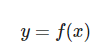

x is a (1-dimensional) sample, and y is the (1-dimensional) target (called regression).
This function could be, for instance, an audio signal like a tone, which would be a sinusoidal function. Here, x would be the time dimension, and y would be a audio value for the given time.

**torch.sin()** function, which directly produces a torch tensor, and also a **torch.randn()** function, which produces random numbers according to a gaussian distribution with zero mean and unit variance. We can use this to simulate microphone and pickup noise

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
device='cpu'

X.shape before view torch.Size([40])
X.shape after view torch.Size([40, 1])


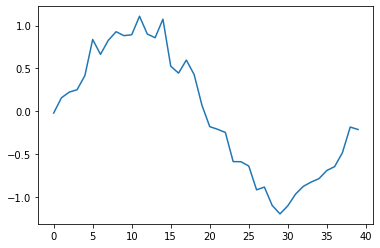

In [2]:
N=40 #number of samples in our signal
#Training set:
#The x input here is the time:
X=torch.arange(0,N,1.0) #generates N time steps for X
print("X.shape before view",X.shape)
X=X.view(N,1) #adding the last dimension for the signal (1 sample each),
print("X.shape after view",X.shape)
#first dimension for the batch of size N
Y=torch.sin(X*3.14/N*2)+torch.randn(X.shape)*0.1 # sinusoid in our training set, plus noise
plt.plot(X,Y)

To see how robust our network is against the **noise** in the training set, we also add new noise.

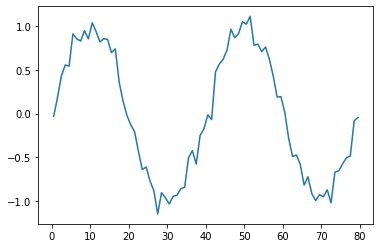

In [3]:
#Validation set, to test generalization, with new noise:
Xval=torch.arange(0.5,2*N,1.0) #generates 2N time steps for X for extrapolation beyond N,
#shifted by 0.5 compared to training set,
#for interpolation between the original sample points.
Xval=Xval.view(2*N,1)
#Validation Target:
Yval=torch.sin(Xval*3.14/N*2)+torch.randn(Xval.shape)*0.1
plt.plot(Xval,Yval)

# Creating 3 layers NN for function approximation

In [4]:
Nodes=10 #This results in a smooth interpolation
#Nodes=80 #this can result in over-fitting

#A 2-layer fully connected network, 1 input (time value), 
#hidden layer has N nodes, 1 output (function value).

class LinNet(nn.Module):
 #define and initialize the layers:
 def __init__(self):
  super(LinNet, self).__init__()
 # Define the model. 
  self.layer1=nn.Sequential(nn.Linear(in_features=1,out_features=Nodes, bias=True))
  self.layer2=nn.Sequential(nn.Linear(in_features=Nodes,out_features=1, bias=True))
 #self.act = nn.LeakyReLU() #non-linear activation function
 #self.act = nn.ReLU() #non-linear activation function
 #self.act = nn.Hardtanh() #non-linear activation function
  self.act = nn.Sigmoid() #non-linear activation function
 #Putting the network together:
 def forward(self, x):
  out = self.layer1(x)
 #print("out.shape=", out.shape)
  out = self.act(out) #comment out if not desired
 #print("out.shape=", out.shape)
  out = self.layer2(out)
 #print("out.shape=", out.shape)
  return out

In [5]:
#create network object:
model = LinNet().to(device)
#Before training:
Ypred=model(X) #the model produces prediction output
print("Ypred.shape=", Ypred.shape)
weights = model.state_dict()   #read obtained weights
print("initial weights=", weights)  #see the random initialization of the weights 
   
#print("model.parameters()=", model.parameters()) 
   

loss_fn = nn.MSELoss() #mean squared error loss
print("Define loss function:",loss_fn)  

#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
print("Define optimizer:",optimizer)

Ypred.shape= torch.Size([40, 1])
initial weights= OrderedDict([('layer1.0.weight', tensor([[-0.2304],
        [ 0.0093],
        [ 0.8700],
        [ 0.1932],
        [ 0.2702],
        [-0.7017],
        [-0.3101],
        [-0.1891],
        [-0.3103],
        [ 0.8749]])), ('layer1.0.bias', tensor([ 0.4458, -0.5035,  0.1655, -0.3022,  0.9181, -0.5859,  0.8989, -0.8190,
         0.1125,  0.0588])), ('layer2.0.weight', tensor([[ 0.1339, -0.1645, -0.2871, -0.1613,  0.2322,  0.2075,  0.1166,  0.1889,
         -0.0375,  0.1327]])), ('layer2.0.bias', tensor([-0.1193]))])
Define loss function: MSELoss()
Define optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [6]:
for epoch in range(10000):
    Ypred=model(X) #the model produces prediction output
    loss=loss_fn(Ypred, Y) #prediction and target compared by loss
    if epoch%1000==0:
        print(epoch, loss.item()) #print current loss value
    optimizer.zero_grad() #optimizer sets previous gradients to zero
    loss.backward() #optimizer computes new gradients
    optimizer.step() #optimizer updates weights

0 0.5041278600692749
1000 0.11011765152215958
2000 0.06716282665729523
3000 0.05734477564692497
4000 0.05272484943270683
5000 0.04867047816514969
6000 0.018456408753991127
7000 0.012500325217843056
8000 0.010717250406742096
9000 0.010234279558062553


In [7]:
weights = model.state_dict()   #read obtained weights
print("obtained weights=", weights)  #see the random initialization of the weights

obtained weights= OrderedDict([('layer1.0.weight', tensor([[-0.4482],
        [ 0.3062],
        [ 0.5981],
        [ 0.3981],
        [ 0.7637],
        [-0.1410],
        [-0.2821],
        [-0.2147],
        [-0.2722],
        [ 0.4447]])), ('layer1.0.bias', tensor([ 2.3176, -3.9385,  2.2531, -2.6762, -2.8370,  4.9434,  4.4715, -0.5017,
         6.6793, -4.1575])), ('layer2.0.weight', tensor([[ 0.6235, -0.8981,  0.0325, -0.5557,  1.3080, -4.4345,  1.3120, -0.0863,
          2.7787,  1.7382]])), ('layer2.0.bias', tensor([-0.2399]))])


for plotting we need numpy array,hence we need to convert from pytorch tensors to numpy array, which we do with the function **.detach.numpy()**.

In [8]:
Ypred=model(X) # Make Predictions based on the obtained weights 
#print("Ypred training set=", Ypred) 
loss=loss_fn(Ypred, Y)
print("Loss on trainig set:", loss.detach().numpy())

Yvalpred=model(Xval) # Make Predictions based on the obtained weights 
#print("Y validation set=", Yvalpred.detach().numpy()) 
loss=loss_fn(Yvalpred[:N,:], Yval[:N,:])
print("Loss on validation set:", loss.detach().numpy())

Loss on trainig set: 0.010056778
Loss on validation set: 0.00916416


If the loss on the training set will go down, but the loss on the validation set goes up, this is a sign of **overfitting**.

"LeakyReLu" leads to a similar loss. with "ReLu", the optimizer has a much harder time to find a good solution, because of the **vanishing gradient** of the ReLu activation function for negative inputs.

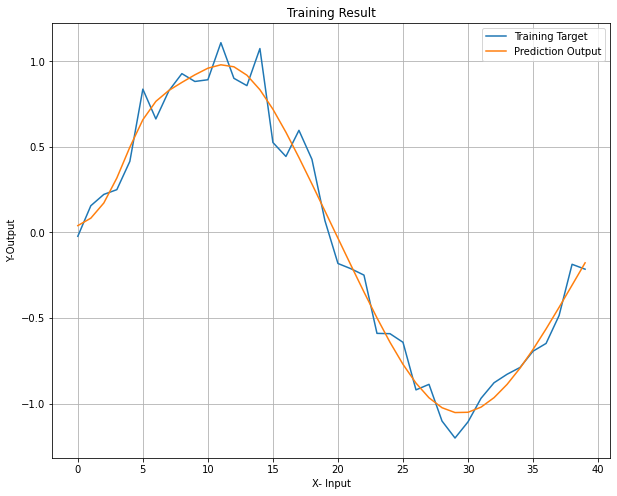

In [9]:
plt.figure(figsize=(10,8))
plt.plot(X.detach().numpy()[:,0],Y.detach().numpy()[:,0])
plt.plot(X.detach().numpy()[:,0],Ypred.detach().numpy()[:,0])
plt.legend(('Training Target', 'Prediction Output'))
plt.xlabel('X- Input')
plt.ylabel('Y-Output')
plt.title('Training Result')
plt.grid()

We see that we get indeed a **smoothed version** of the training set, which means our network is somewhat **robust against the noise on the training set**.

When we predict values that fall within the range of data points taken it is called **interpolation**. When we predict values for points outside the range of data taken it is called **extrapolation**.

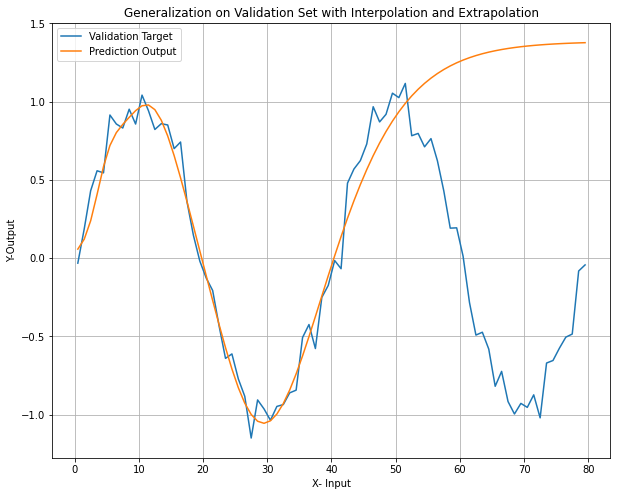

In [10]:
plt.figure(figsize=(10,8))
plt.plot(Xval.detach().numpy()[:,0],Yval.detach().numpy()[:,0])
plt.plot(Xval.detach().numpy()[:,0],Yvalpred.detach().numpy()[:,0])
plt.xlabel('X- Input')
plt.ylabel('Y-Output')
plt.title('Generalization on Validation Set with Interpolation and Extrapolation')
plt.legend(('Validation Target', 'Prediction Output'))
plt.grid()

In [ ]:
weights = model.state_dict()   #read obtained weights
print("weights=", weights)
#Weights of layer 2:
layer2weights=model.state_dict()['layer2.0.weight'].clone() #clone(), otherwise it is just a pointer!
print("model.state_dict()['layer2.0.weight']=", layer2weights)
   
#The resulting function from the network is the sum of the functions of the N nodes.
#To see the functions of the individual nodes, we can just keep their weight unchanged, 
#set the others to zero, and plot the resulting function.
#For that we make mask with zeros for the weights of layer 2, except for one node:

plt.figure(figsize=(10,8))
plt.xlabel('X- Input')
plt.ylabel('Y-Output')
plt.title('Basis Functions of the Network')

for node in range(0,Nodes):
    weightmask=torch.zeros(layer2weights.shape) #mask with all zeros for output layer, except one.
    weightmask[0,node]=1.0 #node "node" unchanged
    #print("weightmask",weightmask)
    #print("layer2weights=",layer2weights)
    #print("layer2weights*weightmask=", layer2weights*weightmask)
    model.state_dict()['layer2.0.weight'].data.copy_(layer2weights*weightmask) #write pytorch structure back to model
    #print("Xval=", Xval)
    Ypred1node=model(Xval) # Make Predictions based on the 1-node weights 
    #print("Ypred1node=", Ypred1node)
    #Plot modified 1-node model:
    plt.plot(Xval.detach().numpy()[:,0],Ypred1node.detach().numpy()[:,0])
plt.grid()      
plt.legend(('Node 0', 'Node 1', 'Node2'));
 #We see the activation function fit with bias and weight 
#to different parts of the target function

To see the functions of the individual nodes, we can just keep their weight unchanged, set the others to zero, and plot the resulting function. For that we make mask with zeros for the weights of layer 2, except for one node, and plot the function. Then we repeat this for every node in a "for" loop.

weights= OrderedDict([('layer1.0.weight', tensor([[-0.4482],
        [ 0.3062],
        [ 0.5981],
        [ 0.3981],
        [ 0.7637],
        [-0.1410],
        [-0.2821],
        [-0.2147],
        [-0.2722],
        [ 0.4447]])), ('layer1.0.bias', tensor([ 2.3176, -3.9385,  2.2531, -2.6762, -2.8370,  4.9434,  4.4715, -0.5017,
         6.6793, -4.1575])), ('layer2.0.weight', tensor([[ 0.6235, -0.8981,  0.0325, -0.5557,  1.3080, -4.4345,  1.3120, -0.0863,
          2.7787,  1.7382]])), ('layer2.0.bias', tensor([-0.2399]))])
model.state_dict()['layer2.0.weight']= tensor([[ 0.6235, -0.8981,  0.0325, -0.5557,  1.3080, -4.4345,  1.3120, -0.0863,
          2.7787,  1.7382]])


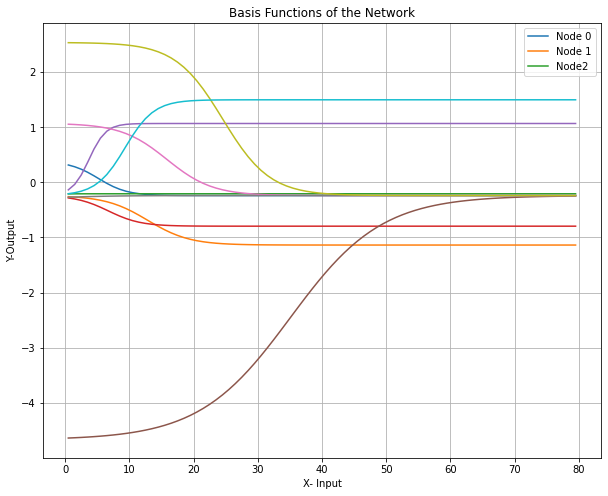

In [11]:
weights = model.state_dict()   #read obtained weights
print("weights=", weights)
#Weights of layer 2:
layer2weights=model.state_dict()['layer2.0.weight'].clone() #clone(), otherwise it is just a pointer!
print("model.state_dict()['layer2.0.weight']=", layer2weights)
   
#The resulting function from the network is the sum of the functions of the N nodes.
#To see the functions of the individual nodes, we can just keep their weight unchanged, 
#set the others to zero, and plot the resulting function.
#For that we make mask with zeros for the weights of layer 2, except for one node:

plt.figure(figsize=(10,8))
plt.xlabel('X- Input')
plt.ylabel('Y-Output')
plt.title('Basis Functions of the Network')

for node in range(0,Nodes):
    weightmask=torch.zeros(layer2weights.shape) #mask with all zeros for output layer, except one.
    weightmask[0,node]=1.0 #node "node" unchanged
    #print("weightmask",weightmask)
    #print("layer2weights=",layer2weights)
    #print("layer2weights*weightmask=", layer2weights*weightmask)
    model.state_dict()['layer2.0.weight'].data.copy_(layer2weights*weightmask) #write pytorch structure back to model
    #print("Xval=", Xval)
    Ypred1node=model(Xval) # Make Predictions based on the 1-node weights 
    #print("Ypred1node=", Ypred1node)
    #Plot modified 1-node model:
    plt.plot(Xval.detach().numpy()[:,0],Ypred1node.detach().numpy()[:,0])
plt.grid()      
plt.legend(('Node 0', 'Node 1', 'Node2'));
 #We see the activation function fit with bias and weight 
#to different parts of the target function

The activation function of each node is fit with bias and weight to different parts of the target function. Since the activation function is only fitted over the training range, they all become flat after that, and hence their sum also becomes constant.

now we change the approach and instead of having **multiple nodes and less layer** we can have less node and more layers(**deeper network**)

we have 5 layers, or 4 linear layers, but each layer has only 2 nodes, so the total number of nodes is similar:

In [13]:
N=40 #number of samples in our signal
Nodes=2 #Nodes in each layer
#Nodes=80  #this can result in over-fitting

#A multi-layer fully connected network, 1 input (time value), hidden layer has Nodes nodes, 1 output (function value).

class LinNet(nn.Module):
    #define and initialize the layers:
    def __init__(self):
        super(LinNet, self).__init__()
        # Define the model. 
        # Generate a fully connected linear neural network model, 2 layers, bias
        # returns: Trainable object
        self.layer1=nn.Sequential(nn.Linear(in_features=1, out_features=Nodes, bias=True))
        self.layer2=nn.Sequential(nn.Linear(in_features=Nodes, out_features=Nodes, bias=True))
        self.layer3=nn.Sequential(nn.Linear(in_features=Nodes, out_features=Nodes, bias=True))
        self.layer4=nn.Sequential(nn.Linear(in_features=Nodes, out_features=1, bias=True))
      
        #self.act = nn.LeakyReLU() #non-linear activation function
        #self.act = nn.ReLU() #non-linear activation function
        #self.act = nn.Hardtanh() #non-linear activation function
        self.act = nn.Sigmoid() #non-linear activation function
      
        #Putting the network together:
    def forward(self, x):
        out = self.layer1(x)
        #print("out.shape=", out.shape)
        out = self.act(out)  #comment out if not desired
        #print("out.shape=", out.shape)
        out = self.layer2(out)
        #print("out.shape=", out.shape)
        out = self.act(out)
        out = self.layer3(out)
        out = self.act(out)
        out = self.layer4(out)
        return out

In [14]:
print("Number of input samples:", N, "number of nodes:", Nodes)
#input tensor, type torch tensor:
#Indices: batch, additional dimensions, features or signal dimension. Here: 1 batch, 3 samples, signal dimension 2: 
#Training set:
#The x input here is the time:
X=torch.arange(0,N,1.0) #generates N time steps for X
X=X.view(N,1) #adding the last dimension for the signal (1 sample each), first dimension for the batch of size N
print("X.shape", X.shape)
#Target here is the (noisy) function value, a sine function + normal distributed random values:
#Y=torch.sin(X)+torch.empty(X.shape).normal_(std=0.5)
Y=torch.sin(X*3.14/N*2)+torch.randn(X.shape)*0.1
#2 periods of the sinusoid in our training set, plus noise
#Y=Y.view(N,1)
print("Y.shape", Y.shape)
#Validation set, to test generalization, with new noise:
Xval=torch.arange(0.5,2*N,1.0) #generates 2N time steps for X for extrapolation beyond N,
#shifted by 0.5 compared to training set, 
#for interpolation between the original sample points.
#print("Xval=", Xval)
Xval=Xval.view(2*N,1)
#Validation Target:
Yval=torch.sin(Xval*3.14/N*2)+torch.randn(Xval.shape)*0.1

Number of input samples: 40 number of nodes: 2
X.shape torch.Size([40, 1])
Y.shape torch.Size([40, 1])


In [15]:
#create network object:
model = LinNet().to(device)
#Before training:
Ypred=model(X) #the model produces prediction output
print("Ypred.shape=", Ypred.shape)
weights = model.state_dict()   #read obtained weights
print("initial weights=", weights)  #see the random initialization of the weights 
  
loss_fn = nn.MSELoss() #mean squared error loss
print("Define loss function:",loss_fn)  
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
print("Define optimizer:",optimizer)

Ypred.shape= torch.Size([40, 1])
initial weights= OrderedDict([('layer1.0.weight', tensor([[-0.3300],
        [ 0.5603]])), ('layer1.0.bias', tensor([ 0.0482, -0.6659])), ('layer2.0.weight', tensor([[ 0.6419, -0.1829],
        [ 0.1173, -0.0102]])), ('layer2.0.bias', tensor([-0.6087,  0.2561])), ('layer3.0.weight', tensor([[ 0.2801, -0.6021],
        [-0.7043, -0.2298]])), ('layer3.0.bias', tensor([-0.1298, -0.6444])), ('layer4.0.weight', tensor([[-0.6194,  0.5505]])), ('layer4.0.bias', tensor([-0.5277]))])
Define loss function: MSELoss()
Define optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [16]:
for epoch in range(150000):
    Ypred=model(X) #the model produces prediction output
    loss=loss_fn(Ypred, Y) #prediction and target compared by loss
    if epoch%25000==0:
        print(epoch, loss.item()) #print current loss value
    optimizer.zero_grad() #optimizer sets previous gradients to zero
    loss.backward() #optimizer computes new gradients
    optimizer.step() #optimizer updates weights
       
Ypred=model(X) # Make Predictions based on the obtained weights 
#print("Ypred training set=", Ypred) 
loss=loss_fn(Ypred, Y)
print("Loss on trainig set:", loss.detach().numpy())

0 0.8957209587097168
25000 0.04413296654820442
50000 0.04329482465982437
75000 0.04300597310066223
100000 0.04290525242686272
125000 0.04285021871328354
Loss on trainig set: 0.042815767


weights= OrderedDict([('layer1.0.weight', tensor([[-0.9685],
        [ 0.7877]])), ('layer1.0.bias', tensor([16.3927,  0.8676])), ('layer2.0.weight', tensor([[ -0.6169,  -4.5187],
        [137.7464,  -2.6166]])), ('layer2.0.bias', tensor([ 5.9879, -0.2589])), ('layer3.0.weight', tensor([[  2.8712, -53.5171],
        [-11.7327,   7.7582]])), ('layer3.0.bias', tensor([-0.3561, -1.5780])), ('layer4.0.weight', tensor([[-1.6476, 10.2596]])), ('layer4.0.bias', tensor([-0.2619]))])
model.state_dict()['layer2.0.weight']= tensor([[ -0.6169,  -4.5187],
        [137.7464,  -2.6166]])


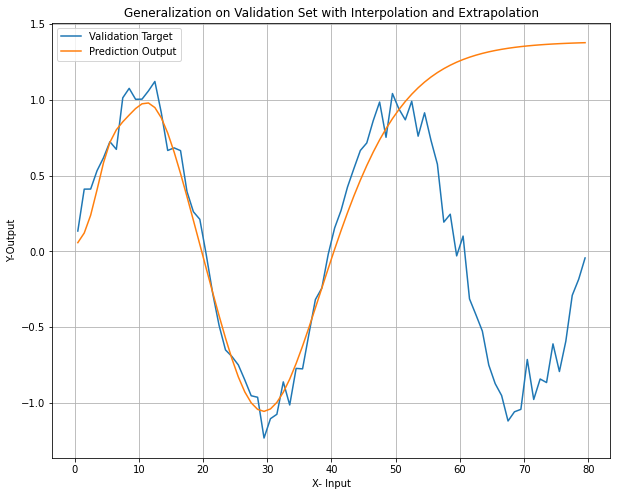

In [17]:
plt.figure(figsize=(10,8))
plt.plot(Xval.detach().numpy()[:,0],Yval.detach().numpy()[:,0])
plt.plot(Xval.detach().numpy()[:,0],Yvalpred.detach().numpy()[:,0])
plt.xlabel('X- Input')
plt.ylabel('Y-Output')
plt.title('Generalization on Validation Set with Interpolation and Extrapolation')
plt.legend(('Validation Target', 'Prediction Output'))
plt.grid()
   
weights = model.state_dict()   #read obtained weights
print("weights=", weights)
#Weights of layer 2:
layer2weights=model.state_dict()['layer2.0.weight'].clone() #clone(), otherwise it is just a pointer!
print("model.state_dict()['layer2.0.weight']=", layer2weights)

as you can see the predicted output doesn't follow the validation target after training interval(N = 40).